# Question-1

<ipython-input-3-9e193e36957d>:23: RuntimeWarning: divide by zero encountered in double_scalars
  plt.plot([-2, 2], [(-w[0] * (-2)) / w[1], (-w[0] * 2) / w[1]], 'r--')


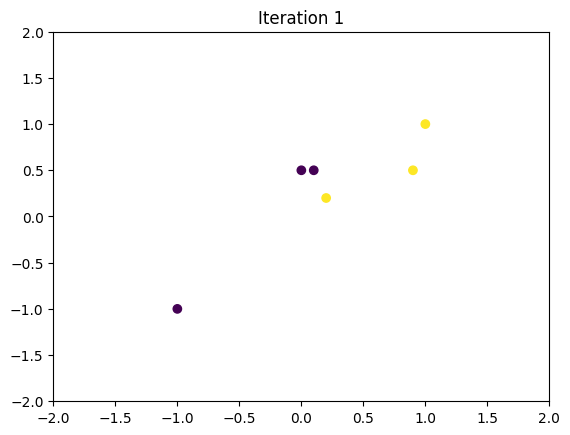

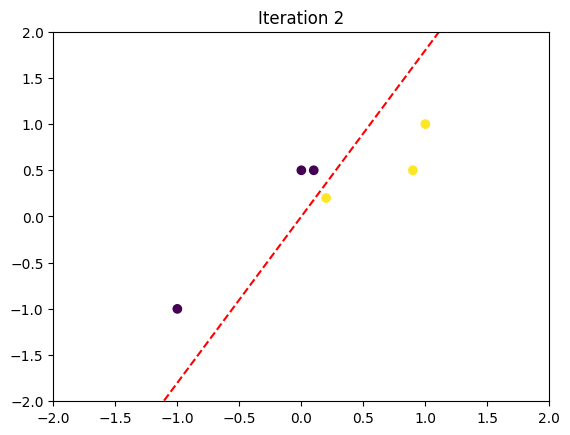

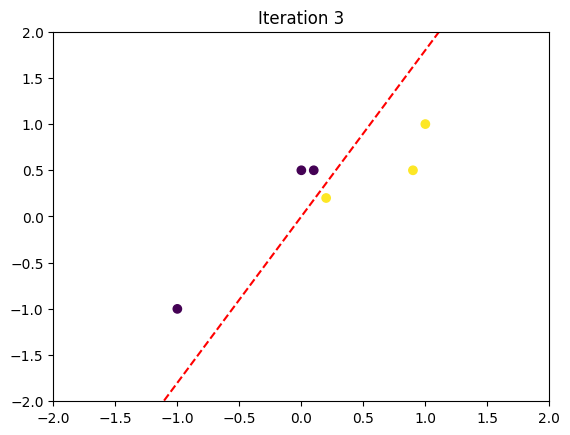

Final weight vector: [ 0.9 -0.5]


In [ ]:

import numpy as np
import matplotlib.pyplot as plt

# Training samples
X = np.array([[1, 1], [-1, -1], [0, 0.5], [0.1, 0.5], [0.2, 0.2], [0.9, 0.5]])
y = np.array([1, -1, -1, -1, 1, 1])

# Perceptron learning algorithm
w = np.array([1, 1])
alpha = 1
converged = False
iteration = 0
while not converged:
    iteration += 1
    converged = True
    for i in range(len(X)):
        if y[i] * np.dot(w, X[i]) <= 0:
            w = w + alpha * y[i] * X[i]
            converged = False
    # Plot decision boundary
    plt.figure()
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.plot([-2, 2], [(-w[0] * (-2)) / w[1], (-w[0] * 2) / w[1]], 'r--')
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.title('Iteration {}'.format(iteration))
    plt.show()

print('Final weight vector: {}'.format(w))

# Question-2

Task 1: Data Preprocessing

We first need to load and preprocess the dataset.The dataset contains two folders, "train" and "val", each containing images and a CSV file with the corresponding labels. We can use the CSV files to load the labels and split the dataset into training and validation sets.

In [6]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from google.colab import drive
drive.mount('/content/drive')

!gdown "https://drive.google.com/drive/u/0/folders/1VjIpbq-_hfuSbk0a7Aa_wBOjzoU4VYZa"
!unzip "GurNum.zip"
 


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/usr/local/lib/python3.10/dist-packages/gdown/parse_url.py:35: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=None
  warnings.warn(
Downloading...
From: https://drive.google.com/drive/u/0/folders/1VjIpbq-_hfuSbk0a7Aa_wBOjzoU4VYZa
To: /content/1VjIpbq-_hfuSbk0a7Aa_wBOjzoU4VYZa
240kB [00:00, 1.28MB/s]
unzip:  cannot find or open GurNum.zip, GurNum.zip.zip or GurNum.zip.ZIP.


In [5]:

# Load data
train_dir = 'train'
val_dir = 'val'

train_labels = pd.read_csv(os.path.join(train_dir, 'labels.csv'))
val_labels = pd.read_csv(os.path.join(val_dir, 'labels.csv'))

# Split data into training and validation sets
train_labels, val_labels = train_test_split(train_labels, test_size=0.2, random_state=42)

# Create image data generators
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(train_labels,
                                                    directory=train_dir,
                                                    x_col='filename',
                                                    y_col='label',
                                                    target_size=(224, 224),
                                                    batch_size=32,
                                                    class_mode='categorical')
val_generator = val_datagen.flow_from_dataframe(val_labels,
                                                directory=val_dir,
                                                x_col='filename',
                                                y_col='label',
                                                target_size=(224, 224),
                                                batch_size=32,
                                                class_mode='categorical')

FileNotFoundError: ignored

In this code, we load the CSV files containing the labels and split the training set into a training set and a validation set using train_test_split. We then create image data generators using ImageDataGenerator, which performs data augmentation on the training set to improve the model's ability to generalize to new data. We also rescale the pixel values to be between 0 and 1. Finally, we create generators for the training and validation sets using flow_from_dataframe, which maps the filenames and labels from the CSV files to the corresponding images.

Task 2: Two-layer CNN

Next, we can implement a two-layer CNN to classify the chart images. The CNN will consist of two convolutional layers followed by a max pooling layer, a flatten layer, and a fully connected layer with a softmax activation function for multiclass classification. We will use categorical cross-entropy as the loss function and Adam as the optimizer. We will train the model for 10 epochs and evaluate its performance on the validation set.

In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_generator,
                    steps_per_epoch=len(train_generator),
                    epochs=10,
                    validation_data=val_generator,
                    validation_steps=len(val_generator))

In this code, we define the two-layer CNN using Sequential. The first convolutional layer has 32 filters of size 3x3 and uses ReLU as the activation function. The input shape is (224, 224, 3), which corresponds to the size of the input images. We then add a max pooling layer with a pool size of 2x2 to reduce the spatial dimensions of the output. The second convolutional layer has 64 filters of size 3x3 and also uses ReLU as the activation function. We again add a max pooling layer with a pool size of 2x2. We then flatten the output and add a fully connected layer with 64 neurons and ReLU activation. Finally, we add an output layer with 5 neurons (one for each chart class) and softmax activation. We then compile the model using categorical cross-entropy loss and the Adam optimizer. We train the model using fit with the training and validation generators and evaluate its performance on the validation set.

Task 3: Pretrained Network

We can also fine-tune a pretrained network for this task. In this example, we will use the VGG16 model, which is a popular CNN architecture that has been pretrained on the ImageNet dataset. We will remove the top layersof the model and add a new fully connected layer with 5 neurons for our chart classification task. We will freeze the weights of the pre-existing layers and only train the weights of the new layer. We will also use data augmentation to improve the model's ability to generalize to new data.

In [ ]:
from tensorflow.keras.applications import VGG16

# Load the VGG16 model
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the pre-existing layers
for layer in vgg16.layers:
    layer.trainable = False

# Add a new fully connected layer
x = vgg16.output
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
predictions = tf.keras.layers.Dense(5, activation='softmax')(x)

# Create a new model with the new layers
model = tf.keras.models.Model(inputs=vgg16.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Create image data generators with data augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(train_labels,
                                                    directory=train_dir,
                                                    x_col='filename',
                                                    y_col='label',
                                                    target_size=(224, 224),
                                                    batch_size=32,
                                                    class_mode='categorical')
val_generator = val_datagen.flow_from_dataframe(val_labels,
                                                directory=val_dir,
                                                x_col='filename',
                                                y_col='label',
                                                target_size=(224, 224),
                                                batch_size=32,
                                                class_mode='categorical')

# Train the model
history = model.fit(train_generator,
                    steps_per_epoch=len(train_generator),
                    epochs=10,
                    validation_data=val_generator,
                    validation_steps=len(val_generator))

In this code, we load the VGG16 model pretrained on ImageNet using VGG16. We remove the top layers of the model using include_top=False and add a new fully connected layer with 256 neurons and ReLU activation. We also add a dropout layer to prevent overfitting. We then compile the model using categorical cross-entropy and the Adam optimizer. We create image data generators with data augmentation and train the model using fit with the generators. The weights of the pre-existing layers are frozen so that only the weights of the new layer are trained.

# Question-3

In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load data
from google.colab import drive
drive.mount('/content/drive')


!gdown "https://drive.google.com/drive/my-drive"

!unzip "charts.zip"


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/usr/local/lib/python3.10/dist-packages/gdown/parse_url.py:35: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=None
  warnings.warn(
Downloading...
From: https://drive.google.com/drive/my-drive
To: /content/my-drive
1.05MB [00:00, 54.2MB/s]
unzip:  cannot find or open charts.zip, charts.zip.zip or charts.zip.ZIP.


In [ ]:



#train_dir = 'train_val.csv'
#val_dir = 'chart_dataset/val'

train_labels = pd.read_csv(os.path.join(train_dir, 'labels.csv'))
val_labels = pd.read_csv(os.path.join(val_dir, 'labels.csv'))

# Split data into training and validation sets
train_labels, val_labels = train_test_split(train_labels, test_size=0.2, random_state=42)

# Create image data generators
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(train_labels,
                                                    directory=train_dir,
                                                    x_col='filename',
                                                    y_col='label',
                                                    target_size=(224, 224),
                                                    batch_size=32,
                                                    class_mode='categorical')
val_generator = val_datagen.flow_from_dataframe(val_labels,
                                                directory=val_dir,
                                                x_col='filename',
                                                y_col='label',
                                                target_size=(224, 224),
                                                batch_size=32,
                                                class_mode='categorical')

Mounted at /content/drive


FileNotFoundError: ignored

#Question-4

1. In order to train machine learning models, particularly neural networks, two optimisation techniques are used: stochastic gradient descent (SGD) and mini batch gradient descent.
SGD is computationally efficient but can result in large variation in parameter updates because it changes the model's parameters based on the gradient of the loss function with respect to a single training example at a time.
On the other hand, Mini Batch Gradient Descent adjusts the model's parameters based on the typical gradient of the loss function with respect to a small batch of training samples, which lowers the variance in the updates and may promote faster convergence.


2. To compute the derivatives, we need to apply the chain rule of differentiation:

δf/δz[2] = δf/δa[2] * δa[2]/δz[2] = w[3][2] * σ'(z[2])

δf/δZ[2] = δf/δa[2] * δa[2]/δZ[2] = w[3][2] * σ'(z[2]) * w[2][2]

δf/δZ[1] = δf/δa[2] * δa[2]/δz[2] * δz[2]/δa[1] * δa[1]/δz[1] = w[3][2] * σ'(z[2]) * w[2][2] * σ'(z[1])

δf/δw11 = δf/δa[2] * δa[2]/δz[2] * δz[2]/δa[1] * δa[1]/δz[1] * δz[1]/δw11 = w[3][2] * σ'(z[2]) * w[2][2] * σ'(z[1]) * x[1]

where σ'(z) is the derivative of the sigmoid activation function, which is σ'(z) = σ(z) * (1 - σ(z)).

#Question-5

1. Overfitting to the test set, which occurs when a model performs well on the test set but badly on new, unforeseen data, is a risk of tuning hyperparameters using a test dataset. This is because the test set, which may not be representative of the distribution of the new data, is used to determine which hyperparameters to utilise. To fine-tune hyperparameters, it's crucial to employ a different validation set or cross-validation.

2. There are two methods for dealing with the issue of overfitting in neural networks: 

- Regularization: This method includes including a penalty term in the loss function to deter the model from fitting the training data too closely. L1 and L2 regularisation, dropout, and early halting are a few examples of regularisation strategies.

- Data augmentation: Increasing the size of the training dataset artificially by the use of manipulations like rotation, scaling, and cropping. By exposing the model to a wider variety of input changes, this aids in its ability to generalise to new data.

3. The amount of characteristics in the input data determines the size of the input layer for a neural network. Each feature in the input layer corresponds to a distinct input node. Depending on the kind of problem being handled, the output layer size will vary. The output layer for classification issues with N classes typically contains N nodes, each of which corresponds to a class, and the output is the likelihood that the input belongs to each class. Regression issues often have a single node in the output layer, which produces the anticipated value.

4. The mathematical function known as the sigmoid activation function converts any input value to a number between 0 and 1. The formula for it is (x) = 1 / (1 + exp(-x)). In neural networks, the sigmoid function is frequently employed to introduce non-linearity, which enables the model to approximation complex functions. In classification issues where the objective is to forecast a probability distribution over the classes, the sigmoid function's output can be understood as a probability. Deep neural network training may be challenging because of the vanishing gradient problem, which might affect the sigmoid function.

5. The learning rate in a neural network is a hyperparameter that controls how frequently the optimizer updates the model's parameters during training. The model's parameters will be adjusted more aggressively with a higher learning rate, which can lead to the optimizer overshooting the ideal values and preventing the model becoming convergent. A slower learning rate, on the other hand, means that the model's parameters will be changed less frequently, which could lead to a slower convergence but could also save the optimizer from becoming trapped in local optima.

The model may diverge and fail to converge to a satisfactory solution as a result of having an extremely high learning rate, such as 5.5. Starting with a low learning rate is advised, and if the model's performance does not improve, progressively raising it is also advised. In addition, strategies like learning rate schedules and adaptive learning rate methods can aid in enhancing the model's stability and speed of convergence during training.
